In [ ]:
import json
import pandas as pd 
from pathlib import Path

In [ ]:
#%pip install pandas

In [ ]:
#%pip install numpy

In [ ]:
#!python -m pip install -U pip
#!python -m pip install -U --force-reinstall "numpy<2.0" "pandas<3.0"

In [ ]:
#conda install -y -c conda-forge "numexpr>=2.8.4" "bottleneck>=1.3.6"


In [3]:
json_path = Path("/Users/brentdrazner/VSCodeProjects/SteamScraper/saved_reviews/stardew_valley_100000.json")

with open(json_path, "r", encoding="utf-8") as f: 
    steam_data = json.load(f)
    
steam_data.keys()

dict_keys(['appid', 'fetched_at_utc', 'request_params', 'count', 'last_cursor', 'reviews'])

In [4]:
reviews = steam_data["reviews"]
df = pd.DataFrame(reviews)
df.shape

(100000, 19)

In [5]:
df.head()

,recommendationid,steamid,language,review,voted_up,timestamp_created,timestamp_updated,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,214600393,76561199484994371,schinese,真的上头，但是也是真的肝疼。不过每个人都有每个人的玩法，肝不肝取决于你喜欢怎么玩。好评！推荐！,True,1767058498,1767058498,0,1,13238,208,13238,0,0,0.5,0,True,False,False
1,214600008,76561199263516863,english,SAM MY BELOVEDDD!!!1,True,1767058167,1767058167,0,6,60,60,30,0,0,0.5,0,True,False,False
2,214599117,76561198018654010,english,"I haven't slept in a while, so yes, game good.",True,1767057330,1767057366,359,47,616,528,616,0,0,0.5,0,True,False,False
3,214598901,76561199071994347,english,it is good,True,1767057150,1767057150,0,1,757,517,757,0,0,0.5,0,False,False,False
4,214598849,76561198335174767,english,"Stardew Valley es, la polla.",True,1767057111,1767057111,34,1,6089,257,6051,0,0,0.5,0,False,False,False


In [6]:
#Display top 5 languages with most total playtime
df.groupby("language")["author_playtime_forever"].describe().sort_values("mean", ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
swedish,133.0,12843.947368,18577.982609,210.0,1884.00,6899.0,13498.00,110671.0
koreana,2835.0,12816.242681,17468.009042,12.0,3175.50,7530.0,15905.00,263434.0
japanese,308.0,12361.064935,26658.148421,12.0,2528.75,6356.5,13387.75,368585.0
english,32771.0,12099.219005,24498.234711,5.0,2412.00,6223.0,13414.00,1455967.0
thai,329.0,11978.419453,13788.595143,38.0,2704.00,7624.0,15705.00,95630.0


In [7]:
#Displays how positive ratings are by language
df.groupby("language")["voted_up"].mean().sort_values(ascending=False)

language
romanian      1.000000
norwegian     1.000000
danish        1.000000
bulgarian     1.000000
spanish       0.989981
latam         0.989637
portuguese    0.989637
schinese      0.989535
indonesian    0.988506
polish        0.988476
italian       0.988417
thai          0.987842
dutch         0.987500
czech         0.985612
french        0.985043
koreana       0.981658
english       0.981416
hungarian     0.981250
german        0.981132
brazilian     0.980178
ukrainian     0.979487
swedish       0.977444
finnish       0.975904
tchinese      0.974122
vietnamese    0.968504
russian       0.962301
turkish       0.955698
greek         0.937500
japanese      0.918831
Name: voted_up, dtype: float64

In [8]:
#Shows first 5 Brazilian reviews
df_brazilian = df[df["language"] == "brazilian"]
df_brazilian.head(5)

,recommendationid,steamid,language,review,voted_up,timestamp_created,timestamp_updated,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
9,214597838,76561199388707178,brazilian,top,True,1767056208,1767056208,0,2,20446,2069,20401,0,0,0.5,0,True,False,False
10,214597736,76561199257539326,brazilian,1 - Abro e inicio uma fazenda\n2 - Jogo por 1 ...,True,1767056121,1767056121,18,1,1600,43,1560,0,0,0.5,0,True,False,False
11,214597558,76561199576794930,brazilian,bem joia,True,1767055940,1767055940,0,1,32817,927,32817,0,0,0.5,0,True,False,False
16,214595517,76561199184479741,brazilian,jogo EPICO. a única parte ruim é que você é mo...,True,1767054172,1767054172,0,2,3416,1284,3416,0,0,0.5,0,False,False,False
23,214593617,76561199014848148,brazilian,"papo de viciado, joguei so 11h na primeira gam...",True,1767052585,1767052585,0,1,706,706,706,0,0,0.5,0,False,False,False


In [10]:
#Shows that there are no early access reviews for this dataset
df_early_access = df.query("written_during_early_access == True")
df_early_access.head(10)

,recommendationid,steamid,language,review,voted_up,timestamp_created,timestamp_updated,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access


In [11]:
#divides up playtime into percentiles 
df["author_playtime_at_review"].quantile(
    [0.5, 0.75, 0.9, 0.95, 0.99]
)

0.50     2773.00
0.75     7803.00
0.90    16513.10
0.95    25406.40
0.99    60576.03
Name: author_playtime_at_review, dtype: float64

In [12]:
#Shows playtime in minutes and hours for first 5 reviews
playtime_cols = [
    "author_playtime_forever",
    "author_playtime_last_two_weeks",
    "author_playtime_at_review",
]
for col in playtime_cols:
    if col in df.columns:
        df[f"{col}_hours"] = df[col] / 60
df[[
    "author_playtime_at_review",
    "author_playtime_at_review_hours"
]].head()


,author_playtime_at_review,author_playtime_at_review_hours
0,13238,220.633333
1,30,0.500000
2,616,10.266667
3,757,12.616667
4,6051,100.850000


In [13]:
#shows playtime percentiles in hours
df["author_playtime_at_review_hours"].quantile(
    [0.5, 0.75, 0.9, 0.95, 0.99]
)

0.50      46.216667
0.75     130.050000
0.90     275.218333
0.95     423.440000
0.99    1009.600500
Name: author_playtime_at_review_hours, dtype: float64

In [14]:
#shows total playtime percentiles
df["author_playtime_forever_hours"].quantile(
    [0.5, 0.75, 0.9, 0.95, 0.99]
)

0.50      93.050000
0.75     185.550000
0.90     337.218333
0.95     500.234167
0.99    1133.403833
Name: author_playtime_forever_hours, dtype: float64

In [15]:
#displays outliers for playtime at review in hours
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

playtime_outliers = iqr_outliers(df["author_playtime_at_review_hours"])

playtime_outliers.sort_values(ascending=False).head(10)


53195    23277.983333
19687    13736.750000
6045     12798.433333
49564    11316.833333
75720    10939.400000
2406     10758.483333
27154    10722.900000
90047     8988.083333
58425     8101.566667
79312     7549.350000
Name: author_playtime_at_review_hours, dtype: float64

In [16]:
#Create group of numerical columns and display basic stats for each col
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
timestamp_created,100000.0,1.755389e+09,6.472184e+06,1.743700e+09,1.750883e+09,1.754671e+09,1.760655e+09,1.767058e+09
timestamp_updated,100000.0,1.755485e+09,6.480408e+06,1.743700e+09,1.750991e+09,1.754803e+09,1.760805e+09,1.767058e+09
author_num_games_owned,100000.0,3.269980e+01,1.629178e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,2.917600e+04
author_num_reviews,100000.0,6.873020e+00,4.734420e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,9.807000e+03
author_playtime_forever,100000.0,9.523049e+03,1.686989e+04,5.000000e+00,2.357000e+03,5.583000e+03,1.113300e+04,1.455967e+06
author_playtime_last_two_weeks,100000.0,2.079326e+02,7.480836e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,2.009400e+04
author_playtime_at_review,100000.0,6.955356e+03,1.527122e+04,5.000000e+00,8.450000e+02,2.773000e+03,7.803000e+03,1.396679e+06
votes_up,100000.0,6.266800e-01,1.632934e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.142000e+03
votes_funny,100000.0,1.138200e-01,2.447016e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.070000e+02
comment_count,100000.0,3.272000e-02,3.735918e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01


In [17]:
#Prettier display of numeric col stats
df[numeric_cols].agg([
    "mean",
    "std",
    "var",
    "min",
    "max",
    "skew",
    "kurt"
]).T

,mean,std,var,min,max,skew,kurt
timestamp_created,1.755389e+09,6.472184e+06,4.188917e+13,1.743700e+09,1.767058e+09,0.110507,-1.015107
timestamp_updated,1.755485e+09,6.480408e+06,4.199569e+13,1.743700e+09,1.767058e+09,0.094789,-1.025429
author_num_games_owned,3.269980e+01,1.629178e+02,2.654222e+04,0.000000e+00,2.917600e+04,78.938489,11759.706886
author_num_reviews,6.873020e+00,4.734420e+01,2.241473e+03,1.000000e+00,9.807000e+03,139.649802,24305.079089
author_playtime_forever,9.523049e+03,1.686989e+04,2.845933e+08,5.000000e+00,1.455967e+06,18.388533,900.453622
author_playtime_last_two_weeks,2.079326e+02,7.480836e+02,5.596291e+05,0.000000e+00,2.009400e+04,8.199418,115.190679
author_playtime_at_review,6.955356e+03,1.527122e+04,2.332101e+08,5.000000e+00,1.396679e+06,20.195672,1083.029085
votes_up,6.266800e-01,1.632934e+01,2.666474e+02,0.000000e+00,2.142000e+03,76.277955,7330.433700
votes_funny,1.138200e-01,2.447016e+00,5.987885e+00,0.000000e+00,3.070000e+02,72.741718,7009.598069
comment_count,3.272000e-02,3.735918e-01,1.395708e-01,0.000000e+00,4.000000e+01,41.160843,2967.987653


In [18]:
#group boolean columns and display the average for each
bool_cols = df.select_dtypes(include="bool").columns

df[bool_cols].mean().sort_values(ascending=False)

voted_up                       0.98281
steam_purchase                 0.88865
received_for_free              0.01523
written_during_early_access    0.00000
dtype: float64

In [19]:
#Display all correlations of numerical columns 
df[numeric_cols].corr()

# Found that votes_up seems to have a high correlation with votes_funny and comment_count

,timestamp_created,timestamp_updated,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,votes_up,votes_funny,comment_count,author_playtime_forever_hours,author_playtime_last_two_weeks_hours,author_playtime_at_review_hours
timestamp_created,1.000000,0.988292,-0.000168,-0.006225,-0.039983,0.248325,0.009860,-0.006610,-0.009477,-0.020789,-0.039983,0.248325,0.009860
timestamp_updated,0.988292,1.000000,0.002706,-0.003630,-0.038960,0.248703,0.012394,-0.004102,-0.008302,-0.017902,-0.038960,0.248703,0.012394
author_num_games_owned,-0.000168,0.002706,1.000000,0.683366,0.005050,-0.021583,0.016667,0.016272,0.013239,0.036385,0.005050,-0.021583,0.016667
author_num_reviews,-0.006225,-0.003630,0.683366,1.000000,-0.015872,-0.015712,-0.008586,0.008218,0.008409,0.023950,-0.015872,-0.015712,-0.008586
author_playtime_forever,-0.039983,-0.038960,0.005050,-0.015872,1.000000,0.182868,0.956797,0.012874,0.006059,0.009137,1.000000,0.182868,0.956797
author_playtime_last_two_weeks,0.248325,0.248703,-0.021583,-0.015712,0.182868,1.000000,0.105875,0.001060,-0.005306,-0.004672,0.182868,1.000000,0.105875
author_playtime_at_review,0.009860,0.012394,0.016667,-0.008586,0.956797,0.105875,1.000000,0.013107,0.008016,0.011630,0.956797,0.105875,1.000000
votes_up,-0.006610,-0.004102,0.016272,0.008218,0.012874,0.001060,0.013107,1.000000,0.561079,0.489249,0.012874,0.001060,0.013107
votes_funny,-0.009477,-0.008302,0.013239,0.008409,0.006059,-0.005306,0.008016,0.561079,1.000000,0.358745,0.006059,-0.005306,0.008016
comment_count,-0.020789,-0.017902,0.036385,0.023950,0.009137,-0.004672,0.011630,0.489249,0.358745,1.000000,0.009137,-0.004672,0.011630


In [49]:
#Shows correlation between votes_up and the other columns sorted 
df[numeric_cols].corr()["votes_up"].sort_values(ascending=False)

votes_up                                1.000000
votes_funny                             0.561079
comment_count                           0.489249
author_num_games_owned                  0.016272
author_playtime_at_review_hours         0.013107
author_playtime_at_review               0.013107
author_playtime_forever                 0.012874
author_playtime_forever_hours           0.012874
author_num_reviews                      0.008218
author_playtime_last_two_weeks          0.001060
author_playtime_last_two_weeks_hours    0.001060
timestamp_updated                      -0.004102
timestamp_created                      -0.006610
Name: votes_up, dtype: float64

In [53]:
#Shows correlation between votes_up and the other columns sorted 
df["voted_up_num"] = (
    df["voted_up"]
    .astype(str)
    .str.lower()
    .map({"true": 1, "false": 0})
)
df[["voted_up", "voted_up_num"]].head()

,voted_up,voted_up_num
0,True,1
1,True,1
2,True,1
3,True,1
4,True,1


In [55]:
df.groupby("playtime_quartile")["voted_up_num"].mean()


/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/1710566593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("playtime_quartile")["voted_up_num"].mean()


playtime_quartile
Q1 (Lowest)     0.965611
Q2              0.986079
Q3              0.988358
Q4 (Highest)    0.991200
Name: voted_up_num, dtype: float64

In [22]:
#Displays stats about the length of each review
df["review_length"] = df["review"].str.len()
df["review_length"].describe()

count    100000.000000
mean         73.799650
std         223.949266
min           0.000000
25%           6.000000
50%          17.000000
75%          57.000000
max        8000.000000
Name: review_length, dtype: float64

In [23]:
df["review_length_quartile"] = pd.qcut(
    df["review_length"],
    q=4,
    labels=["Q1 (Shortest)", "Q2", "Q3", "Q4 (Longest)"]
)

review_length_summary = (
    df.groupby("review_length_quartile")
      .agg(
          reviews=("votes_up", "count"),
          avg_votes_up=("votes_up", "mean"),  # True=1, False=0
          avg_review_length=("review_length", "mean")
      )
      .reset_index()
)

review_length_summary



/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/2503362972.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("review_length_quartile")


,review_length_quartile,reviews,avg_votes_up,avg_review_length
0,Q1 (Shortest),26960,0.078895,3.437908
1,Q2,24406,0.123740,11.141400
2,Q3,23724,0.345937,32.790128
3,Q4 (Longest),24910,1.979687,250.399398


In [24]:
df_rl = df.dropna(subset=["review", "votes_up"]).copy()

df_rl["review_length"] = df_rl["review"].str.len()

df_rl["review_length_quartile"] = pd.qcut(
    df_rl["review_length"],
    q=4,
    duplicates="drop"
)

(
    df_rl.groupby("review_length_quartile")
         .agg(
             reviews=("votes_up", "count"),
             avg_votes_up=("votes_up", "mean"),
             avg_review_length=("review_length", "mean")
         )
         .reset_index()
)


/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/1404946970.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rl.groupby("review_length_quartile")


,review_length_quartile,reviews,avg_votes_up,avg_review_length
0,"(-0.001, 6.0]",26960,0.078895,3.437908
1,"(6.0, 17.0]",24406,0.123740,11.141400
2,"(17.0, 57.0]",23724,0.345937,32.790128
3,"(57.0, 8000.0]",24910,1.979687,250.399398


In [27]:
#Displays that longer reviews are more positive throw quartiles
df["playtime_quantile"] = pd.qcut(
    df["author_playtime_at_review_hours"],
    q=5,
    duplicates="drop"
)

(
    df.groupby("playtime_quantile")
      .agg(
          reviews=("votes_up", "count"),
          avg_votes_up=("votes_up", "mean"),
          median_votes_up=("votes_up", "median"),
          avg_playtime_hours=("author_playtime_at_review_hours", "mean")
      )
)

/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/3245051867.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("playtime_quantile")


,reviews,avg_votes_up,median_votes_up,avg_playtime_hours
playtime_quantile,,,,
"(0.0823, 10.767]",20008,0.326919,0.0,5.723405
"(10.767, 31.033]",19996,0.479146,0.0,19.498315
"(31.033, 70.55]",19997,0.620693,0.0,47.703909
"(70.55, 162.083]",20000,0.752350,0.0,109.334869
"(162.083, 23277.983]",19999,0.954398,0.0,397.381127


In [29]:
#Displays correlation between playtime and review
df[[
    "author_playtime_at_review_hours",
    "votes_up"
]].corr()

,author_playtime_at_review_hours,votes_up
author_playtime_at_review_hours,1.000000,0.013107
votes_up,0.013107,1.000000


In [58]:
#Display quartiles of playtime and review
df["playtime_quartile"] = pd.qcut(
    df["author_playtime_at_review_hours"],
    q=4,
    labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"]
)

quartile_votes = (
    df.groupby("playtime_quartile")["voted_up"]
      .mean()
      .reset_index(name="avg_voted_up")
)

quartile_votes

/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/3526663481.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("playtime_quartile")["voted_up"]


,playtime_quartile,avg_voted_up
0,Q1 (Lowest),0.965611
1,Q2,0.986079
2,Q3,0.988358
3,Q4 (Highest),0.991200


In [57]:
#Shows that more playtime means better reviews
df["playtime_quartile"] = pd.qcut(
    df["author_playtime_at_review_hours"],
    q=4,
    labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"]
)

quartile_summary = (
    df.groupby("playtime_quartile")
      .agg(
          reviews=("voted_up_num", "count"),
          avg_voted_up=("voted_up_num", "mean"),          # True=1, False=0
          avg_playtime_hours=("author_playtime_at_review_hours", "mean")
      )
      .reset_index()
)

quartile_summary

/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/2839049794.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("playtime_quartile")


,playtime_quartile,reviews,avg_voted_up,avg_playtime_hours
0,Q1 (Lowest),25008,0.965611,7.039330
1,Q2,24998,0.986079,28.287586
2,Q3,24995,0.988358,81.420868
3,Q4 (Highest),24999,0.991200,346.972782


In [34]:
import matplotlib.pyplot as plt

In [59]:
# Playtime hours
if "author_playtime_at_review_hours" not in df.columns and "author_playtime_at_review" in df.columns:
    df["author_playtime_at_review_hours"] = df["author_playtime_at_review"] / 60

# Review length (characters)
if "review_length" not in df.columns and "review" in df.columns:
    df["review_length"] = df["review"].fillna("").str.len()

# Make sure votes_up is numeric for averaging (True=1, False=0)
if df["votes_up"].dtype != "bool":
    df["votes_up_bool"] = df["votes_up"].astype(bool)
else:
    df["votes_up_bool"] = df["votes_up"]


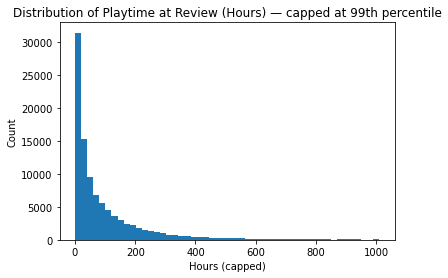

99th percentile cap (hours): 1009.6004999999998


In [36]:
x = df["author_playtime_at_review_hours"].dropna()
cap = x.quantile(0.99)
x_clip = x[x <= cap]

plt.figure()
plt.hist(x_clip, bins=50)
plt.title("Distribution of Playtime at Review (Hours) — capped at 99th percentile")
plt.xlabel("Hours (capped)")
plt.ylabel("Count")
plt.show()

print("99th percentile cap (hours):", cap)


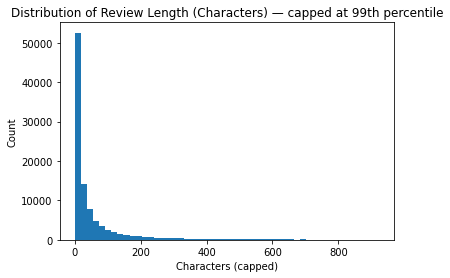

99th percentile cap (chars): 924.0099999999948


In [37]:
x = df["review_length"].dropna()
cap = x.quantile(0.99)
x_clip = x[x <= cap]

plt.figure()
plt.hist(x_clip, bins=50)
plt.title("Distribution of Review Length (Characters) — capped at 99th percentile")
plt.xlabel("Characters (capped)")
plt.ylabel("Count")
plt.show()

print("99th percentile cap (chars):", cap)


/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/646297621.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q.groupby("playtime_quartile")


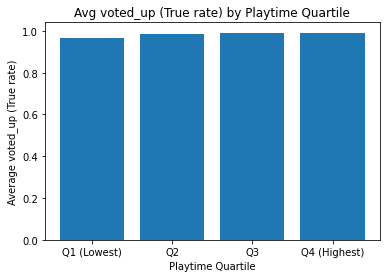

,avg_voted_up_num,avg_playtime_hours,n
playtime_quartile,,,
Q1 (Lowest),0.965611,7.039330,25008
Q2,0.986079,28.287586,24998
Q3,0.988358,81.420868,24995
Q4 (Highest),0.991200,346.972782,24999


In [61]:
df_q = df.dropna(subset=["author_playtime_at_review_hours", "voted_up_num"]).copy()
df_q["playtime_quartile"] = pd.qcut(
    df_q["author_playtime_at_review_hours"],
    q=4,
    labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"]
)

playtime_quartile_summary = (
    df_q.groupby("playtime_quartile")
        .agg(
            avg_voted_up_num=("voted_up_num", "mean"),
            avg_playtime_hours=("author_playtime_at_review_hours", "mean"),
            n=("voted_up_num", "count")
        )
)

plt.figure()
plt.bar(playtime_quartile_summary.index.astype(str), playtime_quartile_summary["avg_voted_up_num"])
plt.title("Avg voted_up (True rate) by Playtime Quartile")
plt.xlabel("Playtime Quartile")
plt.ylabel("Average voted_up (True rate)")
plt.show()

playtime_quartile_summary


/var/folders/xs/qcc4kq6j2_s5j45zyyz64ty80000gn/T/ipykernel_11404/728284217.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lq.groupby("review_length_quartile")


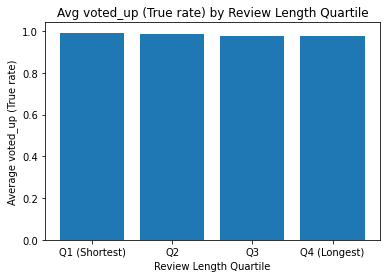

,avg_voted_up_num,avg_review_length,n
review_length_quartile,,,
Q1 (Shortest),0.992359,3.437908,26960
Q2,0.986192,11.141400,24406
Q3,0.976943,32.790128,23724
Q4 (Longest),0.974749,250.399398,24910


In [63]:
df_lq = df.dropna(subset=["review_length", "voted_up_num"]).copy()
df_lq["review_length_quartile"] = pd.qcut(
    df_lq["review_length"],
    q=4,
    labels=["Q1 (Shortest)", "Q2", "Q3", "Q4 (Longest)"]
)

review_length_quartile_summary = (
    df_lq.groupby("review_length_quartile")
         .agg(
             avg_voted_up_num=("voted_up_num", "mean"),
             avg_review_length=("review_length", "mean"),
             n=("voted_up_num", "count")
         )
)

plt.figure()
plt.bar(review_length_quartile_summary.index.astype(str), review_length_quartile_summary["avg_voted_up_num"])
plt.title("Avg voted_up (True rate) by Review Length Quartile")
plt.xlabel("Review Length Quartile")
plt.ylabel("Average voted_up (True rate)")
plt.show()

review_length_quartile_summary


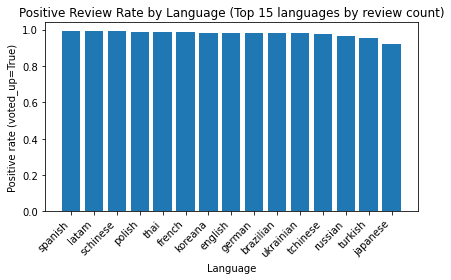

,reviews,positive_rate
language,,
spanish,5190,0.989981
latam,1158,0.989637
schinese,35833,0.989535
polish,781,0.988476
thai,329,0.987842
french,936,0.985043
koreana,2835,0.981658
english,32771,0.981416
german,1113,0.981132


In [64]:
lang = (
    df.dropna(subset=["language", "voted_up"])
      .groupby("language")
      .agg(
          reviews=("voted_up", "count"),
          positive_rate=("voted_up", "mean")
      )
      .sort_values("reviews", ascending=False)
)

top = lang.head(15).sort_values("positive_rate", ascending=False)

plt.figure()
plt.bar(top.index.astype(str), top["positive_rate"])
plt.title("Positive Review Rate by Language (Top 15 languages by review count)")
plt.xlabel("Language")
plt.ylabel("Positive rate (voted_up=True)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top
